In [1]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
from datasets import UnderwaterCreaturesMultiLabelDataset, collate_fn
from torch.utils.data import DataLoader
from models import SimpleCNN
from trainer import Trainer


In [2]:
# root directory
class_names = ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']
num_classes = len(class_names)
root_dir = 'datasets/aquarium-data-cots/aquarium_pretrain'

# datasets
train_dataset = UnderwaterCreaturesMultiLabelDataset(root_dir, split='train', num_classes=num_classes)
valid_dataset = UnderwaterCreaturesMultiLabelDataset(root_dir, split='valid', num_classes=num_classes)
test_dataset = UnderwaterCreaturesMultiLabelDataset(root_dir, split='test', num_classes=num_classes)

# dataloaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, collate_fn=collate_fn)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True, num_workers=4, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, collate_fn=collate_fn)

In [3]:
# create custom cnn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=7).cuda()

# loss and optimizer
num_epochs = 20
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
# initialize trainer
trainer = Trainer(model, device, criterion, optimizer, num_classes=len(class_names), class_names=class_names)

Epoch 1/20, Training Loss: 0.4641
Validation Loss: 0.3970
Epoch 2/20, Training Loss: 0.3768
Validation Loss: 0.3592
Epoch 3/20, Training Loss: 0.3458
Validation Loss: 0.3531
Epoch 4/20, Training Loss: 0.3204
Validation Loss: 0.3279
Epoch 5/20, Training Loss: 0.3078
Validation Loss: 0.3146
Epoch 6/20, Training Loss: 0.2844
Validation Loss: 0.3077
Epoch 7/20, Training Loss: 0.2598
Validation Loss: 0.3046
Epoch 8/20, Training Loss: 0.2439
Validation Loss: 0.3164
Epoch 9/20, Training Loss: 0.2346
Validation Loss: 0.2961
Epoch 10/20, Training Loss: 0.2168
Validation Loss: 0.2786
Epoch 11/20, Training Loss: 0.2104
Validation Loss: 0.2767
Epoch 12/20, Training Loss: 0.2017
Validation Loss: 0.2738
Epoch 13/20, Training Loss: 0.1872
Validation Loss: 0.2762
Epoch 14/20, Training Loss: 0.1835
Validation Loss: 0.2837
Epoch 15/20, Training Loss: 0.1795
Validation Loss: 0.2678
Epoch 16/20, Training Loss: 0.1729
Validation Loss: 0.2664
Epoch 17/20, Training Loss: 0.1573
Validation Loss: 0.2710
Epoch 

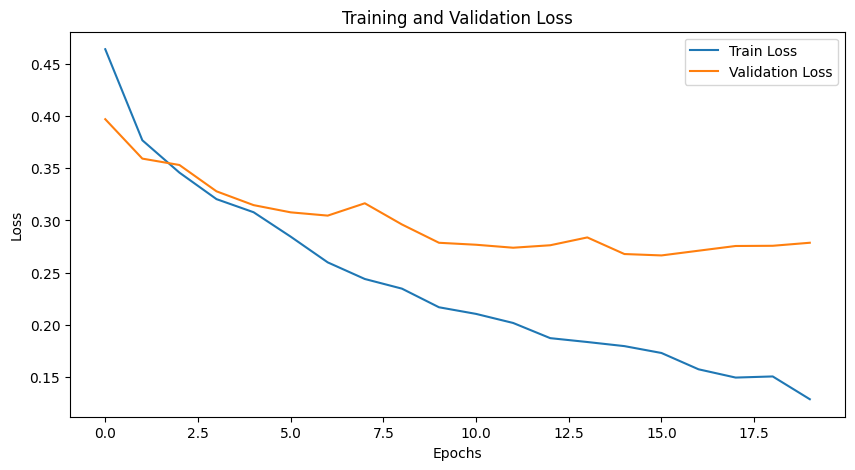

Class fish AP: 0.8300
Class jellyfish AP: 0.7341
Class penguin AP: 0.8188
Class puffin AP: 0.7751
Class shark AP: 0.7209
Class starfish AP: 0.8154
Class stingray AP: 0.7417
mAP: 0.7766


In [12]:
# train
trainer.train(train_loader, valid_loader, num_epochs=num_epochs)

# plot loss curves
trainer.plot_metrics()

# get precisions and avg precision
val_targets, val_outputs, average_precisions, mAP = trainer.evaluate_metrics(valid_loader)

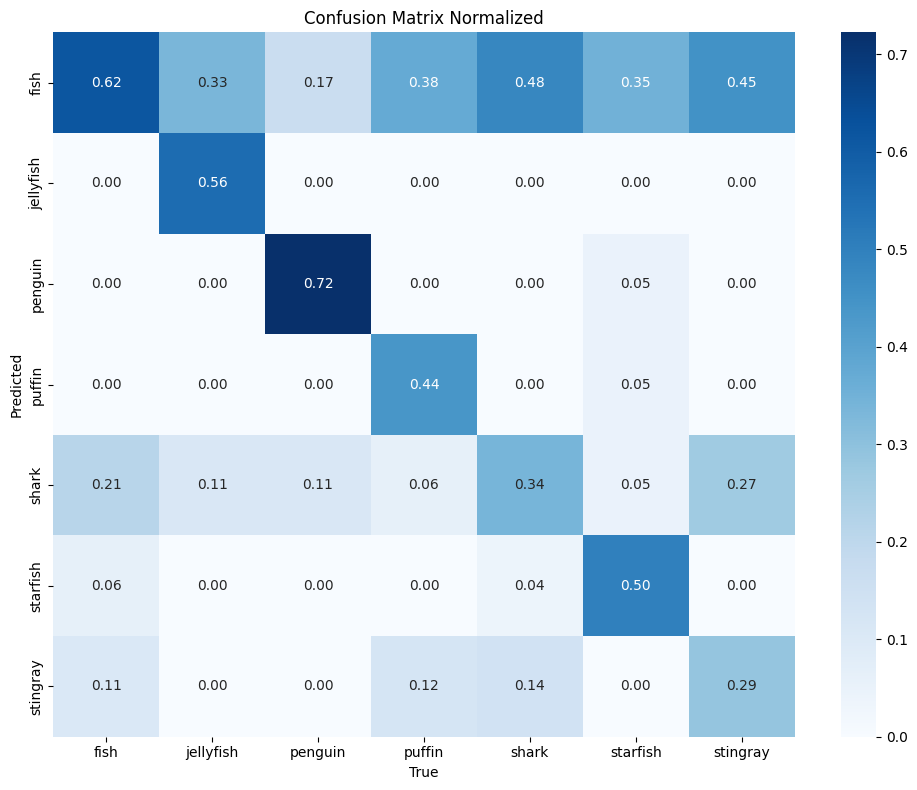

In [13]:
# plot confusion matrix on val set
confusion_matrix_test = trainer.compute_confusion_matrix(val_targets, val_outputs, threshold=0.5)
trainer.plot_pairwise_confusion_matrix(confusion_matrix_test, class_names, epoch=num_epochs, threshold=0.5)

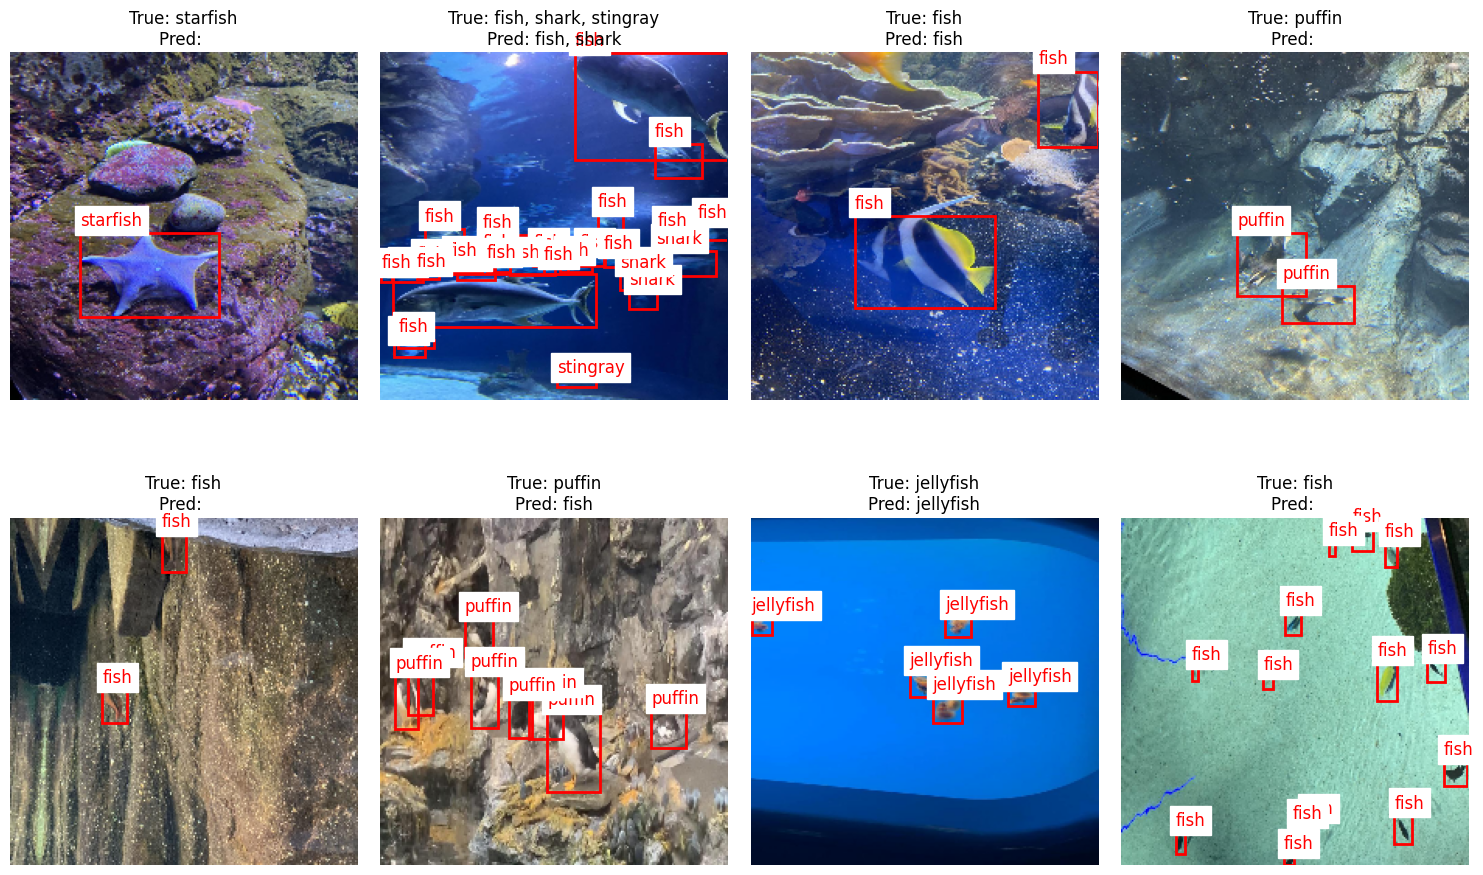

In [14]:
# Visualize predictions on validation set
trainer.visualize_predictions(valid_loader, num_images=8, threshold=0.8)


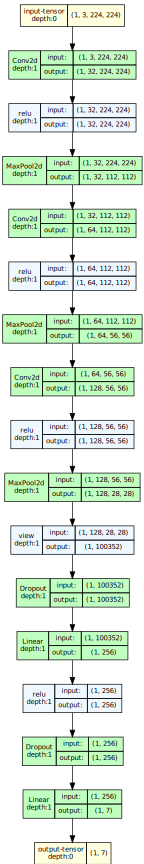

In [11]:
from torchview import draw_graph

model_graph = draw_graph(model, input_size=(1,3,224,224), expand_nested=False, hide_module_functions=True, save_graph=True, filename='cnn.png')
model_graph.visual_graph